# EDA Notebook: Exploring Environmental Factors and Their Impact on Solar Power 

In [1]:
# standard
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# set consistent plotting parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.titlesize": 20, "axes.labelsize": 18, 
                 "xtick.labelsize": 16, "ytick.labelsize": 16}
sns.set_theme(style="ticks", rc=custom_params)

# Load Data

In [3]:
!git clone https://github.com/SandraVillamar/Solar-EDA.git

Cloning into 'Solar-EDA'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [4]:
df = pd.read_csv('Solar-EDA/Pasion et al dataset.csv')
df.head()

Location      Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  \
0  Camp Murray  20171203  1145     47.11    -122.57        84  2.017120e+11   
1  Camp Murray  20171203  1315     47.11    -122.57        84  2.017120e+11   
2  Camp Murray  20171203  1330     47.11    -122.57        84  2.017120e+11   
3  Camp Murray  20171204  1230     47.11    -122.57        84  2.017120e+11   
4  Camp Murray  20171204  1415     47.11    -122.57        84  2.017120e+11   

   Month  Hour  Season  Humidity  AmbientTemp  PolyPwr  Wind.Speed  \
0     12    11  Winter  81.71997     12.86919  2.42769           5   
1     12    13  Winter  96.64917      9.66415  2.46273           0   
2     12    13  Winter  93.61572     15.44983  4.46836           5   
3     12    12  Winter  77.21558     10.36659  1.65364           5   
4     12    14  Winter  54.80347     16.85471  6.57939           3   

   Visibility  Pressure  Cloud.Ceiling  
0        10.0    1010.6            722  
1        10.0    1011.3             23  
2        10.0    1011.6             32  
3         2.0    1024.4              6  
4         3.0    1023.7              9

We can already see that there is some cleaning to do. We will edit the column names and drop some redundant date/time columns.

# Clean Data

In [5]:
# date and time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))  # convert to datetime
df = df.drop(columns=['Date', 'Time', 'YRMODAHRMI'])  # drop redundant columns

# column names
df.columns = df.columns.str.lower()  # make all lowercase
df.columns = df.columns.str.replace('.', '_', regex=False)  # use underscore for space
df = df.rename(columns={'ambienttemp': 'ambient_temp'})

df.head()

location  latitude  longitude  altitude  month  hour  season  humidity  \
0  Camp Murray     47.11    -122.57        84     12    11  Winter  81.71997   
1  Camp Murray     47.11    -122.57        84     12    13  Winter  96.64917   
2  Camp Murray     47.11    -122.57        84     12    13  Winter  93.61572   
3  Camp Murray     47.11    -122.57        84     12    12  Winter  77.21558   
4  Camp Murray     47.11    -122.57        84     12    14  Winter  54.80347   

   ambient_temp  polypwr  wind_speed  visibility  pressure  cloud_ceiling  \
0      12.86919  2.42769           5        10.0    1010.6            722   
1       9.66415  2.46273           0        10.0    1011.3             23   
2      15.44983  4.46836           5        10.0    1011.6             32   
3      10.36659  1.65364           5         2.0    1024.4              6   
4      16.85471  6.57939           3         3.0    1023.7              9   

             datetime  
0 2017-12-03 11:45:00  
1 2017-12-03 13:15:00  
2 2017-12-03 13:30:00  
3 2017-12-04 12:30:00  
4 2017-12-04 14:15:00

**Notes:**
- Aggregate all date and time columns into a single 'DateTime' column.
- Keep hour and month columns in case they become relevant later when looking at correlation.
- Edit column names to all lower case and underscore between words.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   location       21045 non-null  object        
 1   latitude       21045 non-null  float64       
 2   longitude      21045 non-null  float64       
 3   altitude       21045 non-null  int64         
 4   month          21045 non-null  int64         
 5   hour           21045 non-null  int64         
 6   season         21045 non-null  object        
 7   humidity       21045 non-null  float64       
 8   ambient_temp   21045 non-null  float64       
 9   polypwr        21045 non-null  float64       
 10  wind_speed     21045 non-null  int64         
 11  visibility     21045 non-null  float64       
 12  pressure       21045 non-null  float64       
 13  cloud_ceiling  21045 non-null  int64         
 14  datetime       21045 non-null  datetime64[ns]
dtypes: datetime64[ns](1

In [7]:
df.describe()

latitude     longitude      altitude         month          hour  \
count  21045.000000  21045.000000  21045.000000  21045.000000  21045.000000   
mean      38.213823   -108.593678    798.843668      6.565883     12.627845   
std        6.323761     16.364130    770.681794      2.983958      1.672952   
min       20.890000   -156.440000      1.000000      1.000000     10.000000   
25%       38.160000   -117.260000      2.000000      4.000000     11.000000   
50%       38.950000   -111.180000    458.000000      7.000000     13.000000   
75%       41.150000   -104.710000   1370.000000      9.000000     14.000000   
max       47.520000    -80.110000   1947.000000     12.000000     15.000000   

           humidity  ambient_temp       polypwr    wind_speed    visibility  \
count  21045.000000  21045.000000  21045.000000  21045.000000  21045.000000   
mean      37.121941     29.285117     12.978583     10.318318      9.700071   
std       23.823011     12.366820      7.123255      6.385030      1.351949   
min        0.000000    -19.981770      0.257330      0.000000      0.000000   
25%       17.529300     21.915280      6.404570      6.000000     10.000000   
50%       33.123780     30.289150     13.798700      9.000000     10.000000   
75%       52.593990     37.474670     18.863650     14.000000     10.000000   
max       99.987790     65.738370     34.285020     49.000000     10.000000   

           pressure  cloud_ceiling  
count  21045.000000   21045.000000  
mean     925.944747     515.966785  
std       85.215659     301.903379  
min      781.700000       0.000000  
25%      845.500000     140.000000  
50%      961.100000     722.000000  
75%     1008.900000     722.000000  
max     1029.500000     722.000000

**Notes:**
- From first glance, all variables are within a reasonable range.
- There are no missing data.
- We have 12 columns and 21045 observations.

# Initial Exploration of Variables

## Locations of Solar Plants

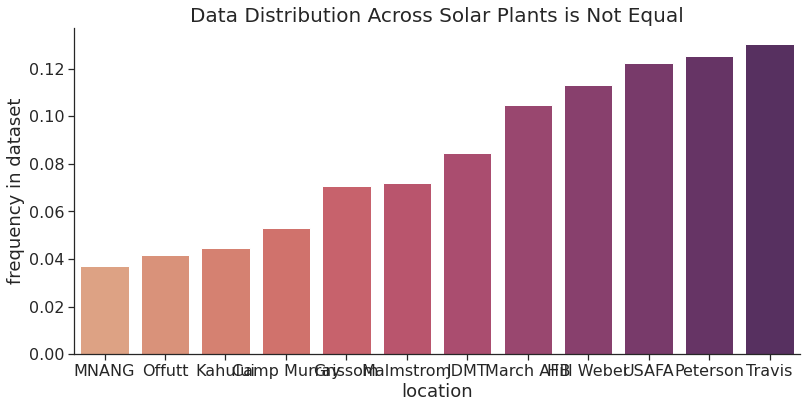

In [8]:
# plot density of observations per location
df_location = df.location.value_counts(normalize=True, ascending=True)\
                         .to_frame()\
                         .rename(columns={'location':'frequency_density'})

plt.figure(figsize=(13,6))
ax = sns.barplot(data=df_location,
                 x=df_location.index,
                 y='frequency_density',
                 palette='flare'
                )
ax.set(xlabel='location', ylabel='frequency in dataset', 
       title='Data Distribution Across Solar Plants is Not Equal');

In [9]:
lat, ind1 = np.unique(df.latitude, return_index=True)  # get lat per location
long, ind2 = np.unique(df.longitude, return_index=True)  # get long per location
locs1 = df.iloc[ind1].location
locs2 = df.iloc[ind2].location
df_location = df_location.join(
    pd.Series(data=lat, index=locs1.values, name='latitude'))
df_location = df_location.join(
    pd.Series(data=long, index=locs2.values, name='longitude'))

df_location

frequency_density  latitude  longitude
MNANG                 0.037063     44.89     -93.20
Offutt                0.041863     41.13     -95.75
Kahului               0.044714     20.89    -156.44
Camp Murray           0.052887     47.11    -122.57
Grissom               0.070658     40.67     -86.15
Malmstrom             0.072084     47.52    -111.18
JDMT                  0.084533     26.98     -80.11
March AFB             0.104728     33.90    -117.26
Hill Weber            0.113281     41.15    -111.99
USAFA                 0.122262     38.95    -104.83
Peterson              0.125445     38.82    -104.71
Travis                0.130482     38.16    -121.56

In [10]:
# map of solar plant locations, colored by density in dataset
fig = go.Figure(
    data = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_location.longitude,
        lat = df_location.latitude,
        text = df_location.index,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df_location.frequency_density,
            cmax = df_location.frequency_density.max(),
            colorbar_title = 'Frequency Density in Dataset'
        )))

fig.update_layout(
        title = 'Solar Plant Locations',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.show()


In [11]:
# Source: https://www.energy.gov/sites/default/files/2015/10/f27/ba_climate_region_guide_7.3.pdf
# According to Office of Energy Efficiency and Renewable Energy, the US can be 
# divided in to 8 climate zones. We classify our solar plant locations as follows:
df_location.loc[['Grissom', 'Malmstrom', 'MNANG', 'Camp Murray'], 'climate_zone'] = 'cold-humid'
df_location.loc[['March AFB', 'Travis'], 'climate_zone'] = 'hot-dry'
df_location.loc[['Hill Weber', 'USAFA', 'Peterson', 'Offutt'], 'climate_zone'] = 'cold-dry'
df_location.loc[['JDMT', 'Kahului'], 'climate_zone'] = 'hot-humid'

climate_prop = df_location.groupby('climate_zone').frequency_density.sum().to_frame()
climate_prop = climate_prop.loc[['cold-humid', 'cold-dry', 'hot-humid', 'hot-dry']]
color_discrete_sequence = ["blue","goldenrod", "green",  "red"]

In [12]:
fig = px.bar(climate_prop, x='frequency_density', y=climate_prop.index, color=climate_prop.index, 
             color_discrete_sequence=color_discrete_sequence
             )
fig.update_layout(yaxis_title='Climate Type', xaxis_title='Proportion of Data',
                  yaxis={'categoryorder':'total descending'},
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend_title='Climate Type'
                  )

In [13]:
# map of solar plant locations, colored by climate
fig = px.scatter_geo(
    data_frame = df_location,
    locationmode = 'USA-states',
    lon = 'longitude',
    lat = 'latitude',
    color = 'climate_zone',
    size = 'frequency_density',
    hover_name = df_location.index,
    hover_data = {'frequency_density':':.2f'},
    color_discrete_sequence=color_discrete_sequence
)

fig.update_layout(
        title = 'Distribution of Data by Climate',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(212, 212, 212)",
            subunitcolor = "rgb(255, 255, 255)",
            countrycolor = "rgb(255, 255, 255)",
            # landcolor = "rgb(250, 250, 250)",
            # subunitcolor = "rgb(217, 217, 217)",
            # countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
        legend=dict(
          yanchor="top",
          y=0.99,
          xanchor="left",
          x=0.01
        ),
        
)

fig.show()

In [14]:
# which locations carry the most amount of data?
df_location.loc[df_location.frequency_density > .10]

frequency_density  latitude  longitude climate_zone
March AFB            0.104728     33.90    -117.26      hot-dry
Hill Weber           0.113281     41.15    -111.99     cold-dry
USAFA                0.122262     38.95    -104.83     cold-dry
Peterson             0.125445     38.82    -104.71     cold-dry
Travis               0.130482     38.16    -121.56      hot-dry

**Notes:**
- We have 12 locations.
- Each location represents somewhere between 4-13% of the data.
- Solar plant locations are distributed across the following climate zones: cold-humid, hot-humid, cold-dry, and hot-dry.
- Locations responsible for more than 10% of the data are in climate zones hot-dry or cold-dry.

## Date and Time

In [15]:
print('min date: ', df.datetime.min())
print('max date: ', df.datetime.max())
print('range of dates: ', df.datetime.max() - df.datetime.min())
print()
print('min hour: ', df.hour.min())
print('max hour: ', df.hour.max())
print('range of hours: ', df.hour.max() - df.hour.min())

print()
print(df.groupby('location')['datetime'].min())
print()
print(df.groupby('location')['datetime'].max())
print()
print(df.groupby('location')['datetime'].max() - df.groupby('location')['datetime'].min())

min date:  2017-05-23 11:00:00
max date:  2018-10-04 15:00:00
range of dates:  499 days 04:00:00

min hour:  10
max hour:  15
range of hours:  5

location
Camp Murray   2017-12-03 11:45:00
Grissom       2017-11-07 11:00:00
Hill Weber    2017-06-19 15:00:00
JDMT          2017-05-23 11:00:00
Kahului       2017-11-03 10:00:00
MNANG         2017-11-09 10:00:00
Malmstrom     2017-10-31 10:00:00
March AFB     2017-07-06 13:00:00
Offutt        2018-04-01 10:00:00
Peterson      2017-06-23 10:00:00
Travis        2017-06-09 11:00:00
USAFA         2017-05-25 10:00:00
Name: datetime, dtype: datetime64[ns]

location
Camp Murray   2018-10-02 15:00:00
Grissom       2018-10-04 13:30:00
Hill Weber    2018-10-04 15:00:00
JDMT          2018-05-24 10:00:00
Kahului       2018-06-13 15:00:00
MNANG         2018-10-02 14:00:00
Malmstrom     2018-09-30 12:15:00
March AFB     2018-10-02 15:00:00
Offutt        2018-09-27 15:00:00
Peterson      2018-09-27 15:00:00
Travis        2018-10-03 13:00:00
USAFA         2

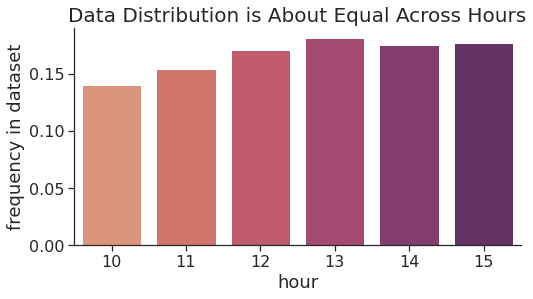

In [16]:
df_hour = df.hour.value_counts(normalize=True)\
                 .to_frame()\
                 .rename(columns={'hour':'frequency_density'})

plt.figure(figsize=(8,4))
ax = sns.barplot(data=df_hour,
                 x=df_hour.index,
                 y='frequency_density',
                 palette='flare'
                )
ax.set(xlabel='hour', ylabel='frequency in dataset', 
       title='Data Distribution is About Equal Across Hours');

**Notes:**
- Some solar plants (such as Offutt and Kahului) have a smaller span of data.
- The data ranges over ~500 days from 5/23/2017 to 10/4/2018.
- The data observations are only during the middle of the day i.e. between hours 10 and 15. This makes sense as we are looking at solar power output which is directly related to irradiance. There should be no solar power output at night as there is no sunlight.

## Season

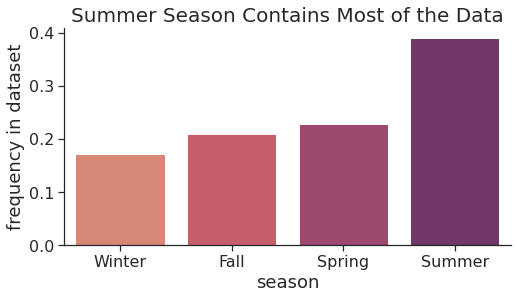

In [17]:
df_season = df.season.value_counts(normalize=True, ascending=True)\
                     .to_frame()\
                     .rename(columns={'season':'frequency_density'})

plt.figure(figsize=(8,4))
ax = sns.barplot(data=df_season,
                 x=df_season.index,
                 y='frequency_density',
                 palette='flare'
                )
ax.set(xlabel='season', ylabel='frequency in dataset',
       title='Summer Season Contains Most of the Data');

**Notes:**
- The Summer category has about twice as much data as the rest of the seasons.

## Altitude

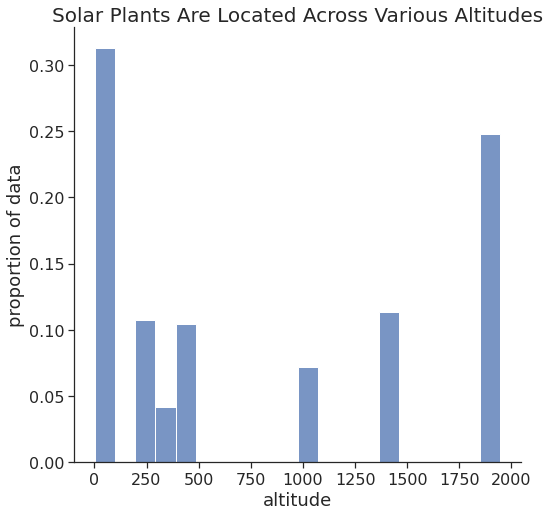

In [18]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.altitude, color="b", stat='probability')
ax.set(ylabel="proportion of data", xlabel="altitude", 
       title="Solar Plants Are Located Across Various Altitudes");

## Humidity

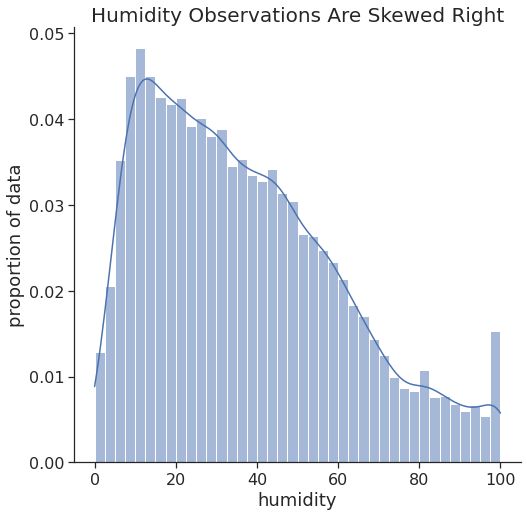

In [20]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.humidity, color="b", stat='probability', kde=True)
ax.set(ylabel="proportion of data", xlabel="humidity", 
       title="Humidity Observations Are Skewed Right",
       );

## Ambient Temperature

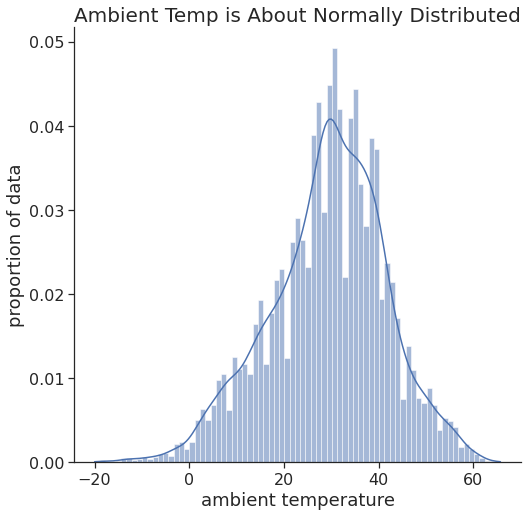

In [21]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.ambient_temp, color="b", stat='probability', kde=True)
ax.set(ylabel="proportion of data", xlabel="ambient temperature", 
       title="Ambient Temp is About Normally Distributed");

## Wind Speed

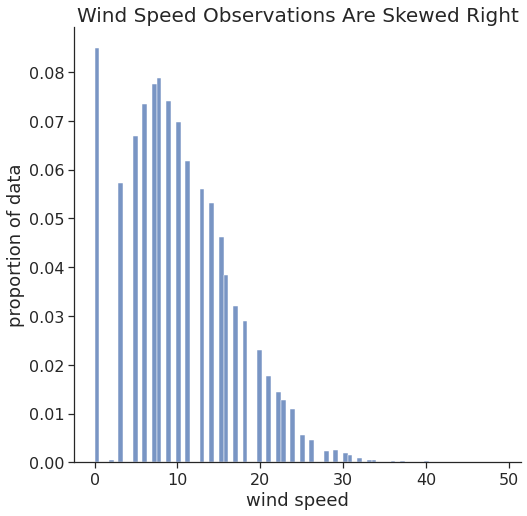

In [22]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.wind_speed, color="b", stat='probability')
ax.set(ylabel="proportion of data", xlabel="wind speed", 
       title="Wind Speed Observations Are Skewed Right");

## Visibility

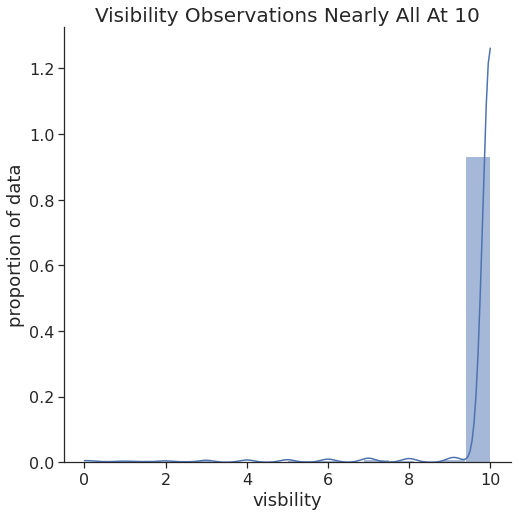

In [23]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.visibility, color="b", stat='probability', kde=True)
ax.set(ylabel="proportion of data", xlabel="visbility", 
       title="Visibility Observations Nearly All At 10");

In [24]:
df.visibility.value_counts()

10.0    19668
9.1       231
7.0       193
8.0       177
6.0       146
5.0       123
4.0       111
3.0        95
0.0        68
2.0        62
1.0        36
1.5        25
2.5        23
0.3        13
0.8        13
0.5        12
1.3        11
0.1         8
0.9         8
1.8         7
6.2         5
0.4         5
0.6         2
8.8         2
6.9         1
Name: visibility, dtype: int64

## Pressure

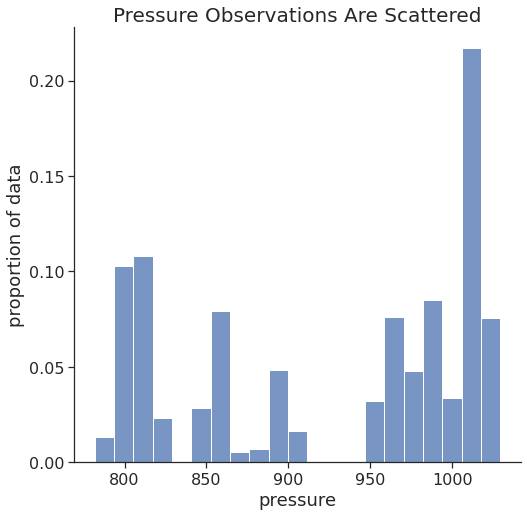

In [25]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.pressure, color="b", stat='probability')
ax.set(ylabel="proportion of data", xlabel="pressure", 
       title="Pressure Observations Are Scattered");

## Cloud Ceiling

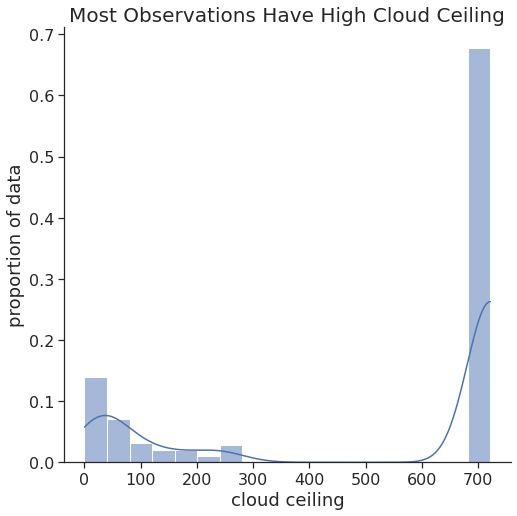

In [26]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.cloud_ceiling, color="b", stat='probability', kde=True)
ax.set(ylabel="proportion of data", xlabel="cloud ceiling", 
       title="Most Observations Have High Cloud Ceiling");

## Power

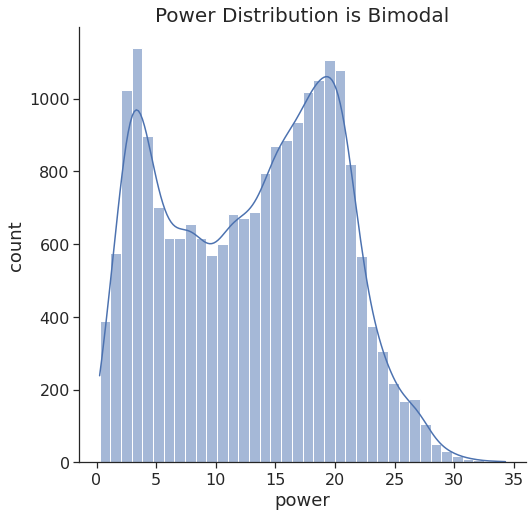

In [59]:
plt.figure(figsize=(8,8))
ax = sns.histplot(df.polypwr, color="b", stat='count', kde=True)
ax.set(ylabel="count", xlabel="power", title="Power Distribution is Bimodal");

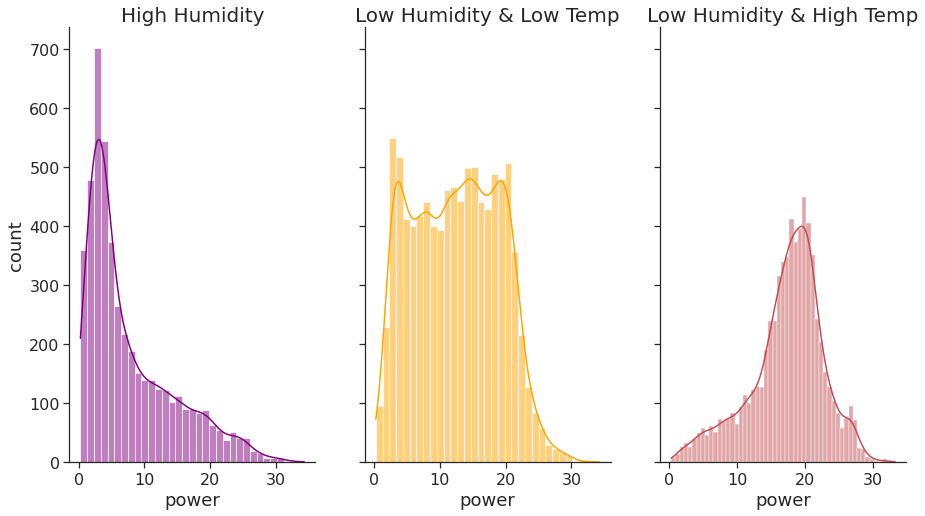

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15,8), sharey=True)
sns.histplot(df.polypwr[df.humidity > 55], stat='count', kde=True, ax=axs[0], color='purple')
axs[0].set(ylabel="count", xlabel="power", title="High Humidity");

sns.histplot(df.polypwr[(df.humidity <= 55) & (df.ambient_temp <= 35)], stat='count', kde=True, ax=axs[1], color='orange')
axs[1].set(ylabel="count", xlabel="power", title="Low Humidity & Low Temp");

sns.histplot(df.polypwr[(df.humidity <= 55) & (df.ambient_temp > 35)], stat='count', kde=True, ax=axs[2], color='r')
axs[2].set(ylabel="count", xlabel="power", title="Low Humidity & High Temp");

**Notes:**
- There are two apparent peaks in the power density distribution; We segregate the observations to show what underlying variables cause these peaks.

# Correlation Between Variables

## Correlation for All Sites

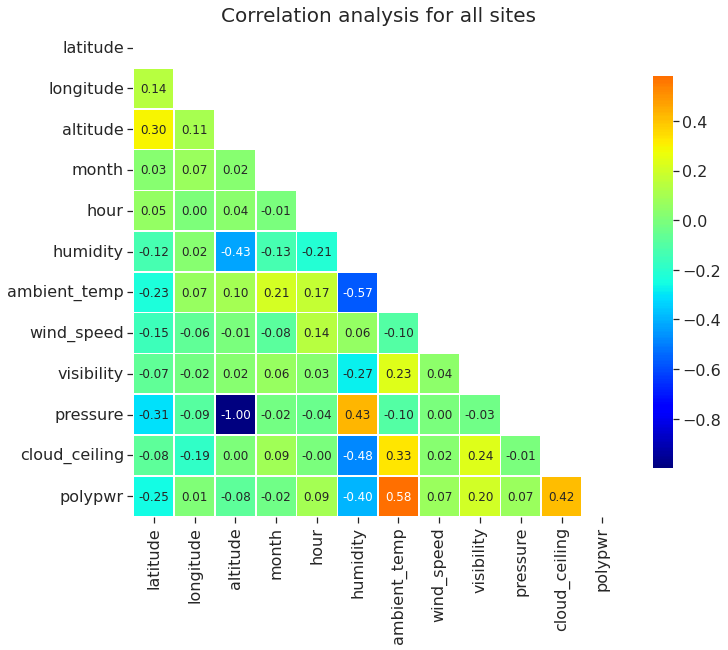

In [65]:
# correlation heatmap for entire dataset
df_corr = df[['latitude', 'longitude', 'altitude', 'month', 'hour', 
              'season', 'humidity', 'ambient_temp', 'wind_speed', 
              'visibility', 'pressure', 'cloud_ceiling', 'polypwr']].corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='jet', center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

## Correlation at Site-Level

<Figure size 432x288 with 0 Axes>

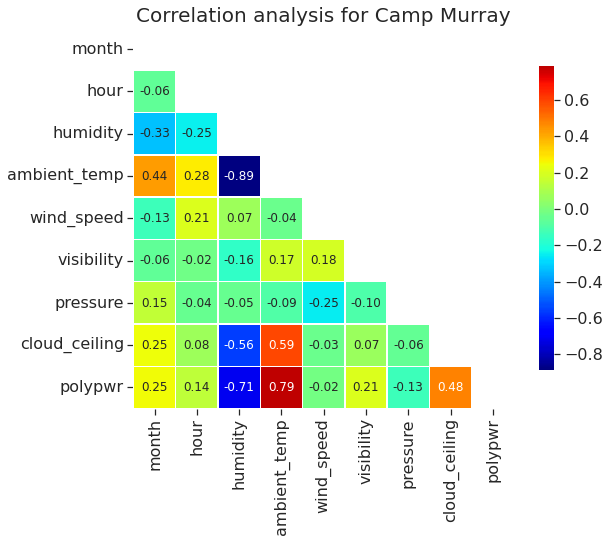

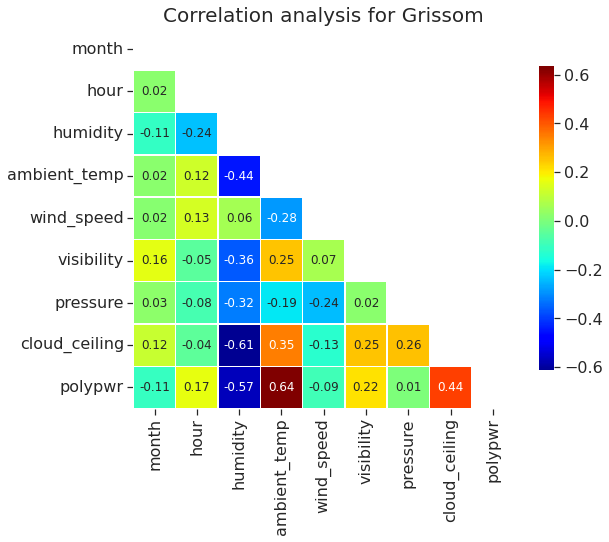

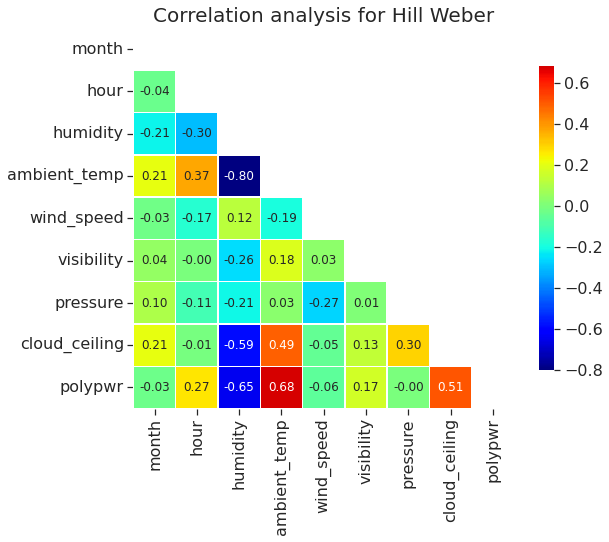

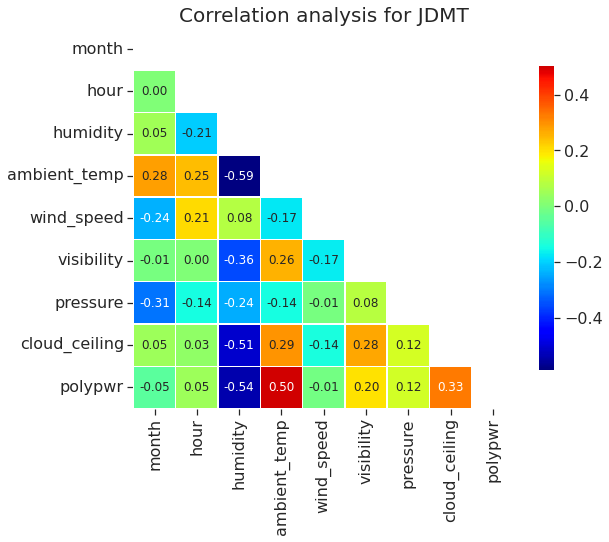

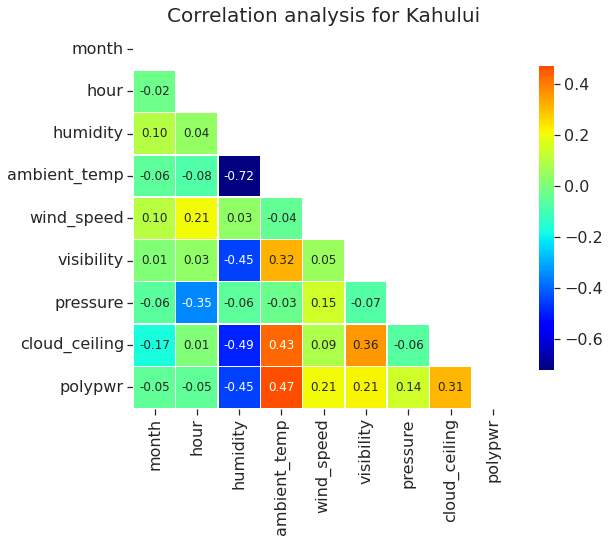

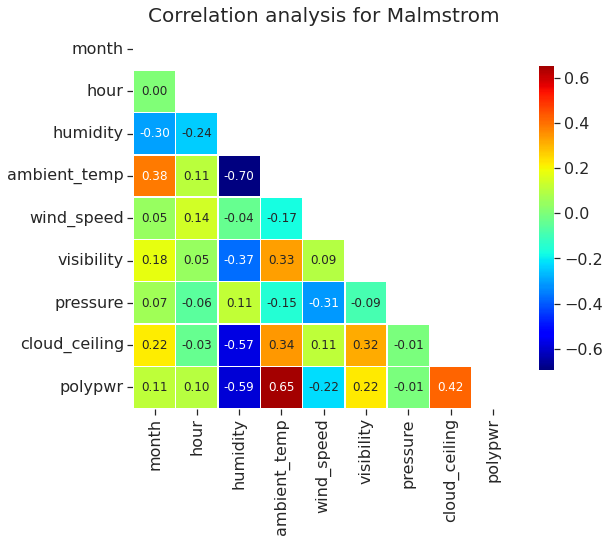

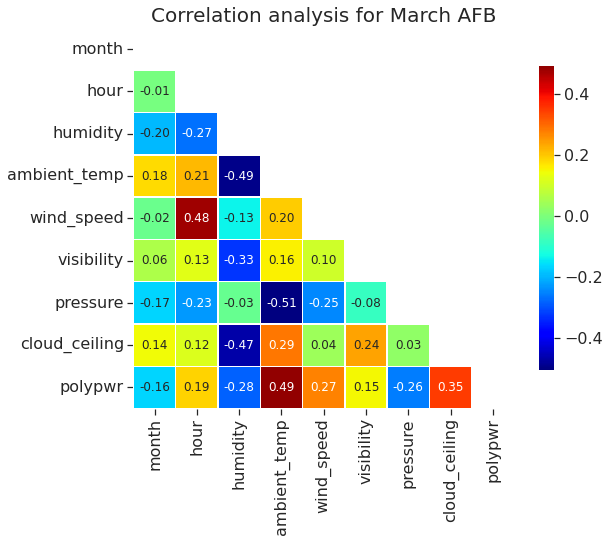

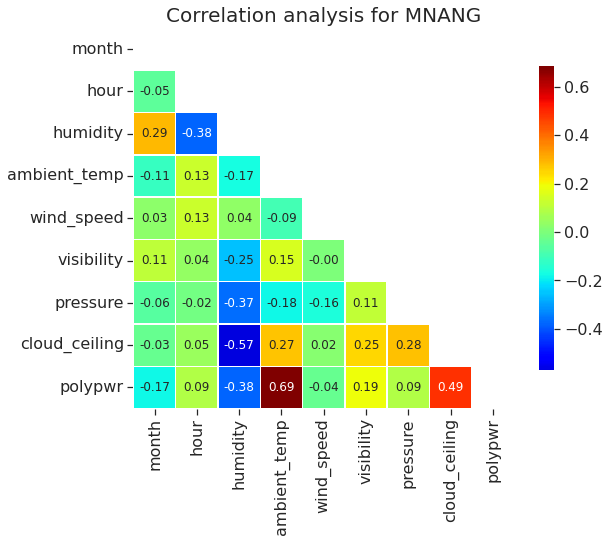

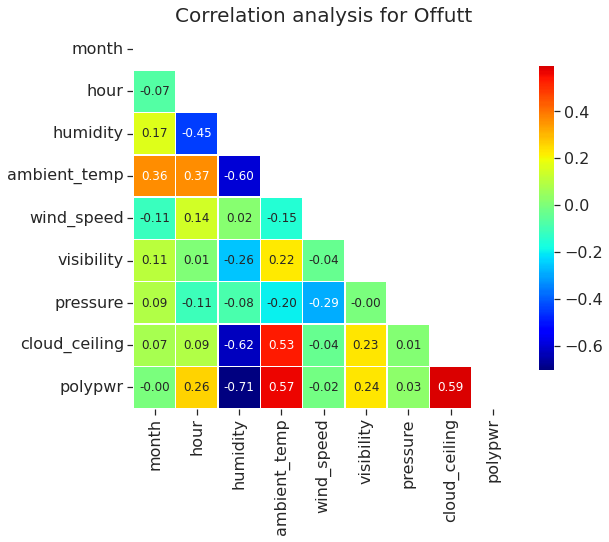

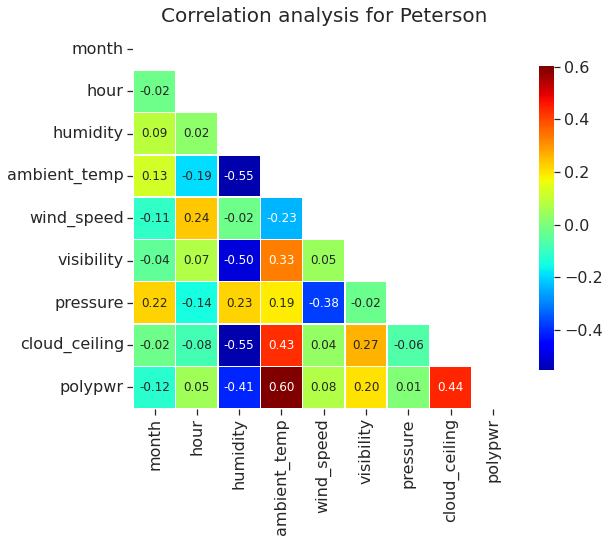

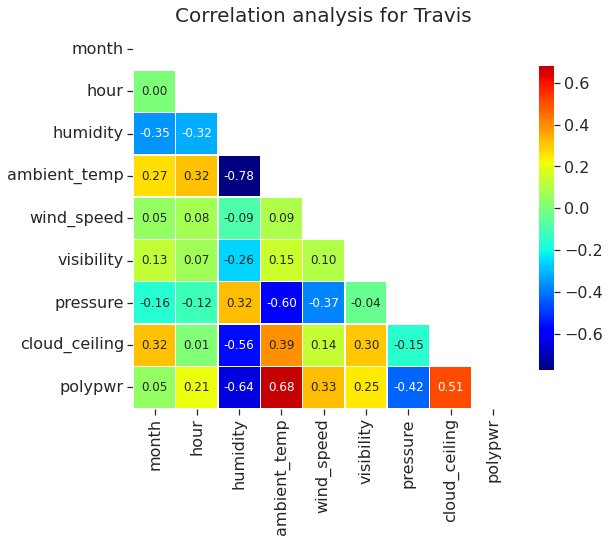

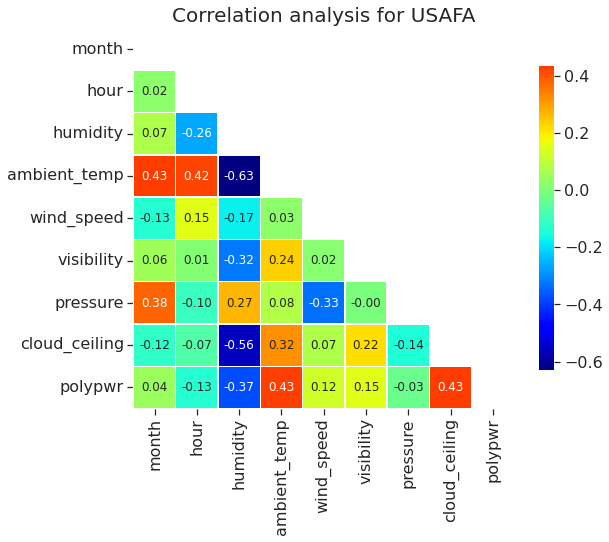

In [66]:
# correlation heatmap per site
df_pwr_corr = df_corr.loc['polypwr'].to_frame().rename(columns={'polypwr':'all_sites'})

for i, location in enumerate(df.location.unique()):

    df_corr = df.loc[df.location == location, 
                     ['month', 'hour', 'season', 'humidity', 'ambient_temp', 
                      'wind_speed', 'visibility', 'pressure', 'cloud_ceiling',
                      'polypwr']
                    ].corr()

    df_pwr_corr[location] = df_corr.loc['polypwr'].copy()
    mask = np.triu(np.ones_like(df_corr, dtype=bool))

    plt.figure(i);
    fig, ax = plt.subplots(figsize=(9, 7));
    sns.heatmap(df_corr, mask=mask, cmap='jet', center=0, annot=True, fmt='.2f',
                square=True, linewidths=.5, cbar_kws={"shrink": .8});
    plt.title(f'Correlation analysis for {location}');

In [67]:
# correlation with polypwr per site
df_pwr_corr = df_pwr_corr.transpose()
df_pwr_corr

latitude  longitude  altitude     month      hour  humidity  \
all_sites   -0.253049   0.012446 -0.077585 -0.024981  0.094935 -0.397819   
Camp Murray       NaN        NaN       NaN  0.249526  0.138916 -0.706716   
Grissom           NaN        NaN       NaN -0.105660  0.166752 -0.568796   
Hill Weber        NaN        NaN       NaN -0.031975  0.268811 -0.647631   
JDMT              NaN        NaN       NaN -0.050135  0.049437 -0.540432   
Kahului           NaN        NaN       NaN -0.046548 -0.045456 -0.448861   
Malmstrom         NaN        NaN       NaN  0.110009  0.100138 -0.587285   
March AFB         NaN        NaN       NaN -0.164966  0.186816 -0.284127   
MNANG             NaN        NaN       NaN -0.174416  0.086799 -0.375922   
Offutt            NaN        NaN       NaN -0.000385  0.259705 -0.705894   
Peterson          NaN        NaN       NaN -0.116073  0.054363 -0.408204   
Travis            NaN        NaN       NaN  0.045850  0.210972 -0.644343   
USAFA             NaN        NaN       NaN  0.044551 -0.128309 -0.374887   

             ambient_temp  wind_speed  visibility  pressure  cloud_ceiling  \
all_sites        0.580395    0.071087    0.204905  0.073867       0.416574   
Camp Murray      0.785855   -0.018228    0.206784 -0.134374       0.479792   
Grissom          0.635155   -0.090949    0.215425  0.005016       0.435134   
Hill Weber       0.681805   -0.058253    0.168712 -0.003248       0.512447   
JDMT             0.502627   -0.010688    0.198321  0.120921       0.327721   
Kahului          0.469569    0.206386    0.214622  0.138522       0.314139   
Malmstrom        0.650813   -0.220118    0.222363 -0.006567       0.418969   
March AFB        0.490850    0.274621    0.150124 -0.255655       0.349615   
MNANG            0.685566   -0.035380    0.192985  0.089102       0.488094   
Offutt           0.573029   -0.015399    0.237563  0.025311       0.593728   
Peterson         0.602166    0.076625    0.204203  0.009418       0.442257   
Travis           0.680799    0.325926    0.250318 -0.423888       0.512396   
USAFA            0.428540    0.124486    0.151911 -0.030573       0.430612   

             polypwr  
all_sites        1.0  
Camp Murray      1.0  
Grissom          1.0  
Hill Weber       1.0  
JDMT             1.0  
Kahului          1.0  
Malmstrom        1.0  
March AFB        1.0  
MNANG            1.0  
Offutt           1.0  
Peterson         1.0  
Travis           1.0  
USAFA            1.0

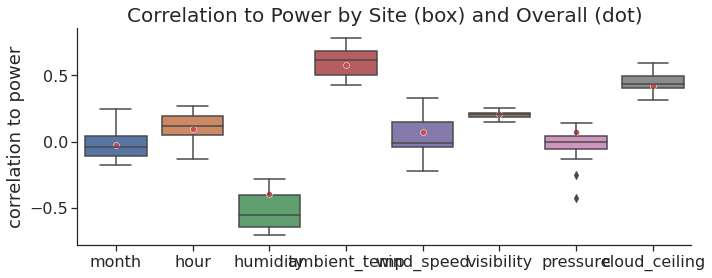

In [68]:
var_data = df_pwr_corr.loc[:,df_pwr_corr.columns[3:-1]].iloc[1:]

plt.figure(figsize=(11,4))
ax = sns.boxplot(data=var_data)
ax = sns.scatterplot(x=df_pwr_corr.loc['all_sites'].iloc[3:-1].index,
                     y=df_pwr_corr.loc['all_sites'].iloc[3:-1], 
                     color='r'
                    )
ax.set(ylabel='correlation to power', title='Correlation to Power by Site (box) and Overall (dot)');

In [69]:
# find outliers in pressure vs. power correlation
df_pwr_corr.loc[df_pwr_corr.pressure < -.2]

latitude  longitude  altitude     month      hour  humidity  \
March AFB       NaN        NaN       NaN -0.164966  0.186816 -0.284127   
Travis          NaN        NaN       NaN  0.045850  0.210972 -0.644343   

           ambient_temp  wind_speed  visibility  pressure  cloud_ceiling  \
March AFB      0.490850    0.274621    0.150124 -0.255655       0.349615   
Travis         0.680799    0.325926    0.250318 -0.423888       0.512396   

           polypwr  
March AFB      1.0  
Travis         1.0

In [70]:
# what is the climate of these outlier locations?
df_location.loc[['March AFB', 'Travis']]

frequency_density  latitude  longitude climate_zone
March AFB           0.104728     33.90    -117.26      hot-dry
Travis              0.130482     38.16    -121.56      hot-dry

In [71]:
df_location.loc[df_location.climate_zone == 'hot-dry']

# we can see that they both have the same climate (hot-dry) AND they are the 
# only two locations that are categorized as this climate.

frequency_density  latitude  longitude climate_zone
March AFB           0.104728     33.90    -117.26      hot-dry
Travis              0.130482     38.16    -121.56      hot-dry

**Notes:**
- ALL sites:
    - humidity, ambient_temp, and cloud_ceiling have the highest (positive/negative) correlation to power when looking at all sites
    - latitude and visibility are also worth looking into
- site-level:
    - humidity: some sites have a larger negative correlation to power, meaning humidity could be a good indicator for power output in those sites but not all sites
    - wind speed: at least one site has a somewhat high positive correlation to power (0.4), but most sites have negligent correlation (-0.2 to 0.2). However, notice that some sites negatively correlate to wind speed and others positively correlate. This could mean that different sites might need different models. Or it could mean that wind speed combined with another variable is what affects power, and not wind speed alone.
    - pressure: for most sites pressure is not a strong indicator of power output, but a few sites have outlying behavior in that there is a larger negative correlation

**PLAN:**
  - For all sites, dive deeper into the relationship between power and:
    - latitude
    - and visibility.
  - For site-level, dive deeper into the relationship between power and:
    - humidity, 
    - ambient_temp, 
    - and cloud_ceiling.
  - Assess relationship between power and pressure for hot-dry climate.


# Extracting Variables that Explain Power

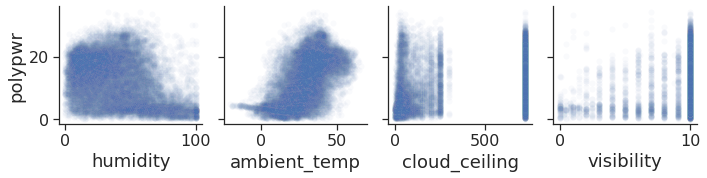

In [72]:
# pairplot with darker shading to emphasize density of observations
sns.pairplot(data=df, 
             y_vars=['polypwr'], 
             x_vars=["humidity", "ambient_temp", "cloud_ceiling", "visibility"],
             plot_kws={'alpha':0.03}
            );

In [73]:
dic = {}
climate = []
for i, item in enumerate(df['location']):
    if item == 'Camp Murray': 
        count1 = i
        climate.append('cold-humid')
    if item == 'Grissom': 
        count2 = i
        climate.append('cold-humid')
    if item == 'Hill Weber': 
        count3 = i
        climate.append('cold-dry')
    if item == 'JDMT': 
        count4 = i
        climate.append('hot-humid')
    if item == 'Kahului': 
        count5 = i
        climate.append('hot-humid')
    if item == 'Malmstrom': 
        count6 = i
        climate.append('cold-humid')
    if item == 'March AFB': 
        count7 = i
        climate.append('hot-dry')
    if item == 'MNANG': 
        count8 = i
        climate.append('cold-humid')
    if item == 'Offutt': 
        count9 = i
        climate.append('cold-dry')
    if item == 'Peterson': 
        count10 = i
        climate.append('cold-dry')
    if item == 'Travis': 
        count11 = i
        climate.append('hot-dry')
    if item == 'USAFA': 
        count12 = i
        climate.append('cold-dry')
    
dic['Camp_Murray'] = df.iloc[:count1+1]
dic['Grissom'] = df.iloc[count1+1:count2+1] 
dic['Hill_Weber'] = df.iloc[count2+1:count3+1]
dic['JDMT'] = df.iloc[count3+1:count4+1]
dic['Kahului'] = df.iloc[count4+1:count5+1]
dic['Malmstrom'] = df.iloc[count5+1:count6+1] 
dic['March_AFB'] = df.iloc[count6+1:count7+1]
dic['MNANG'] = df.iloc[count7+1:count8+1]
dic['Offutt'] = df.iloc[count8+1:count9+1]
dic['Peterson'] = df.iloc[count9+1:count10+1]
dic['Travis'] = df.iloc[count10+1:count11+1]
dic['USAFA'] = df.iloc[count11+1:count12+1]
df['climate']=climate

## Temperature VS. Power

**Higher temperature indicates higher power level, positive trend line can be observed.**

**This is shown in most locations with an exception case Kahului.**

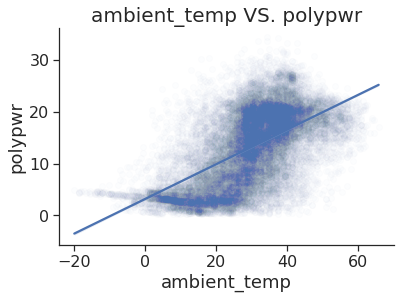

In [74]:
sns.regplot(x="ambient_temp", y="polypwr", fit_reg = True, data=df, scatter_kws={'alpha':0.01}).set(title = "ambient_temp VS. polypwr")
plt.savefig("AmbientTemp_VS_Power.png", bbox_inches="tight")

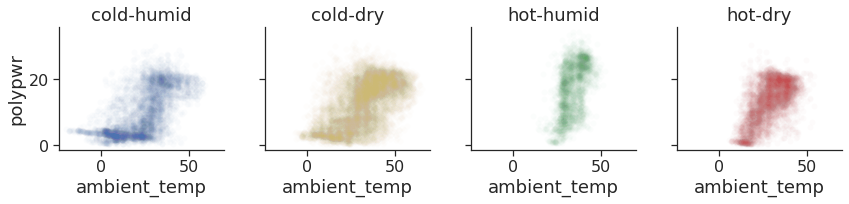

In [75]:
g = sns.FacetGrid(df, col="climate", col_wrap=4, hue = 'climate', palette=["b", "y", "g", "r"])
g = (g.map(sns.scatterplot, "ambient_temp", "polypwr", alpha = 0.02).set_titles("{col_name}"))
plt.savefig('Temp VS Power.png', dpi=300)

## Humidity VS. Power


**Lower humidity indicates higher power level, negative trend line can be observed.**

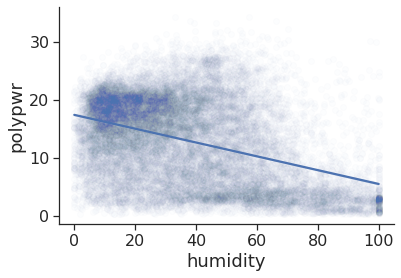

In [76]:
sns.regplot(x="humidity", y="polypwr", fit_reg = True, data=df, scatter_kws={'alpha':0.01})

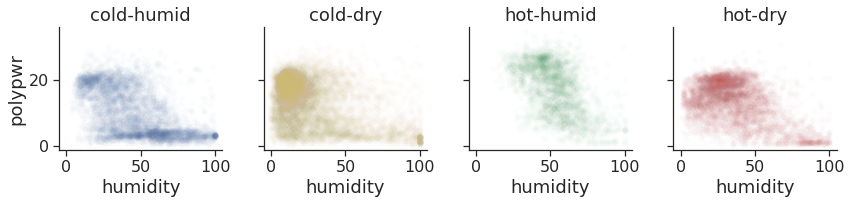

In [77]:
g = sns.FacetGrid(df, col="climate", col_wrap=4, hue = 'climate', palette=["b", "y", "g", "r"])
g = (g.map(sns.scatterplot, "humidity", "polypwr", alpha = 0.02).set_titles("{col_name}"))
plt.savefig('Humidity_VS_Power.png', bbox_inches='tight', dpi=300)

##Humidity VS. Temperature

**Humidity is inversely proportional to ambient temperature.**




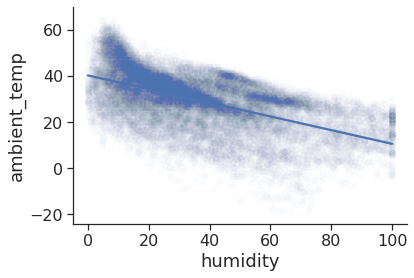

In [78]:
sns.regplot(x="humidity", y="ambient_temp", fit_reg = True, data=df, scatter_kws={'alpha':0.01})

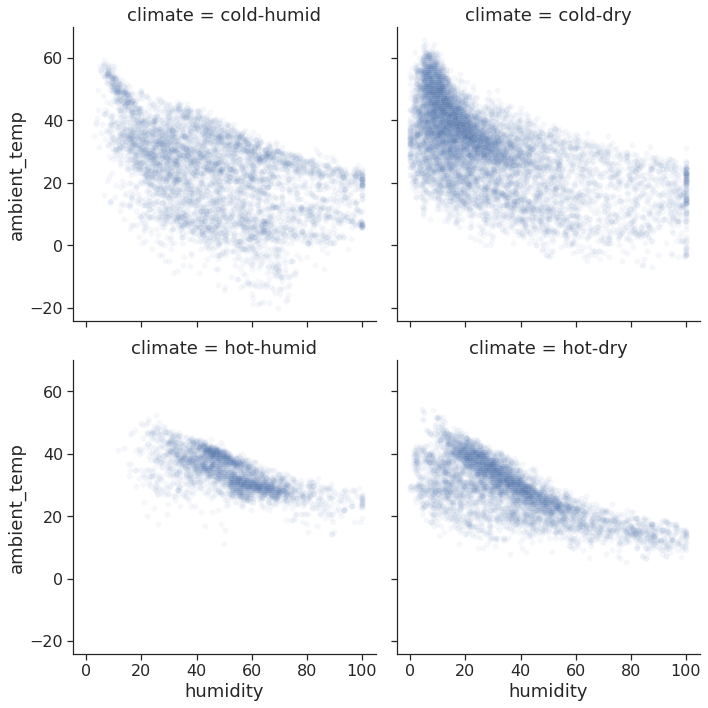

In [79]:
sns.relplot(data=df,x="humidity", y="ambient_temp",col="climate",col_wrap=2, alpha = 0.05)

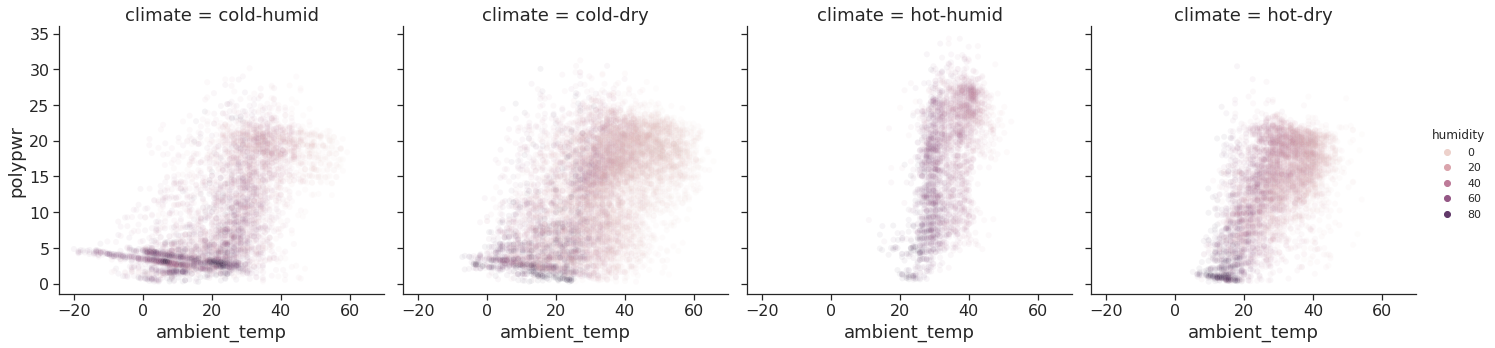

In [80]:
sns.relplot(data=df,x="ambient_temp", y="polypwr", hue = "humidity", col="climate",col_wrap=4, alpha = 0.05)
plt.savefig('Humidity_Temp_VS_Power.png', bbox_inches='tight')

##Case Study: Kahului

**Humidity and temperature data points are cluster in narraow region for all months (low variance), which caused the vertial cluster shape that is observed in the Temp vs Power plot.**

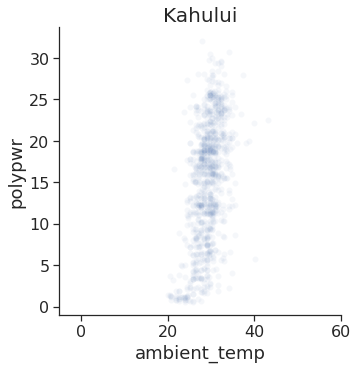

In [81]:
sns.relplot(data=dic['Kahului'],x="ambient_temp", y="polypwr", alpha = 0.05).set(title='Kahului')
plt.xlim(-5, 60)
plt.savefig('Kahului_AmbientTemp_VS_Power.png', bbox_inches='tight')

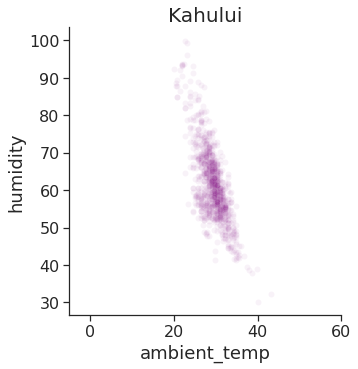

In [82]:
sns.relplot(data=dic['Kahului'],x="ambient_temp", y="humidity", alpha = 0.05, color="purple").set(title='Kahului')
plt.xlim(-5, 60)
plt.savefig('Kahului _Humidity_VS_Temp.png', bbox_inches='tight')

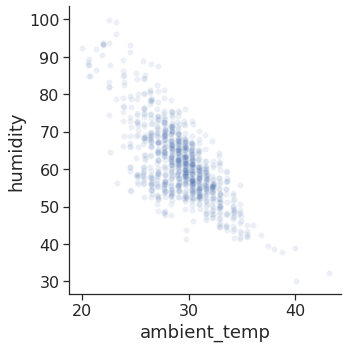

In [ ]:
sns.relplot(data=dic['Kahului'],x="ambient_temp", y="humidity", alpha = 0.1)

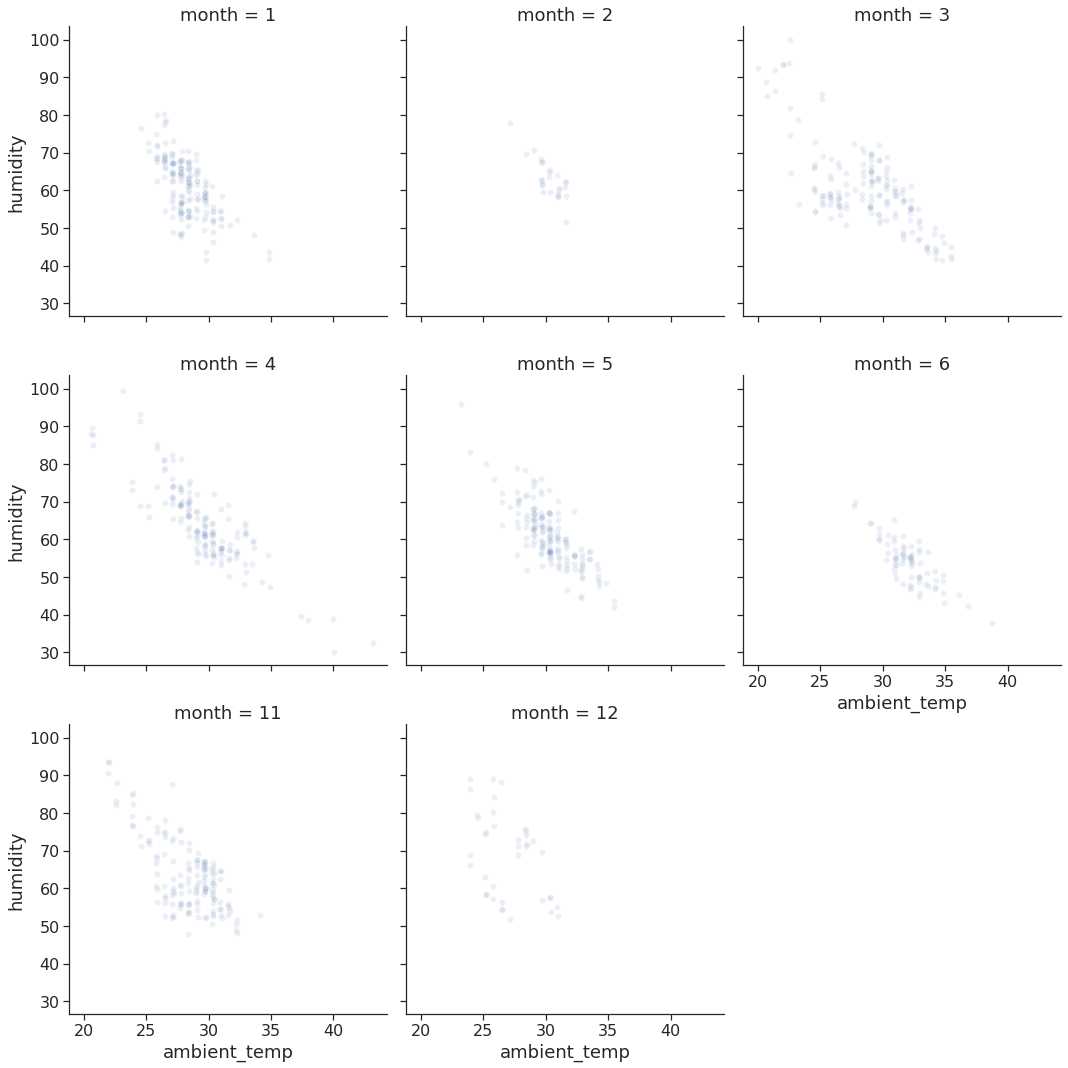

In [ ]:
sns.relplot(data=dic['Kahului'],x="ambient_temp", y="humidity",col="month",col_wrap=3, alpha = 0.1)

**Hill Weber**

**Good counter case is Hill Weber, where its temerature and humidity readings span across large data range.**

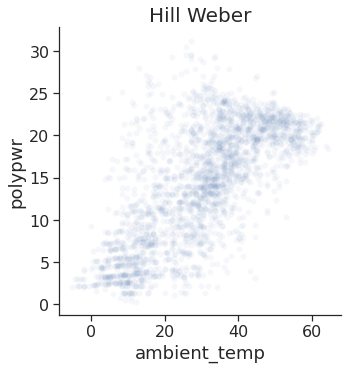

In [84]:
sns.relplot(data=dic['Hill_Weber'],x="ambient_temp", y="polypwr", alpha = 0.05).set(title='Hill Weber')

plt.savefig('Hill_Weber_AmbientTemp_VS_Power.png', bbox_inches='tight')

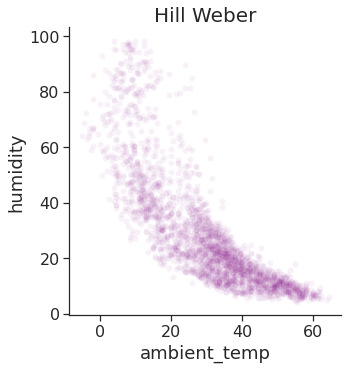

In [83]:
sns.relplot(data=dic['Hill_Weber'],x="ambient_temp", y="humidity", alpha = 0.05, color="purple").set(title='Hill Weber')
plt.savefig('Hill_Weber _Humidity_VS_Temp.png', bbox_inches='tight')

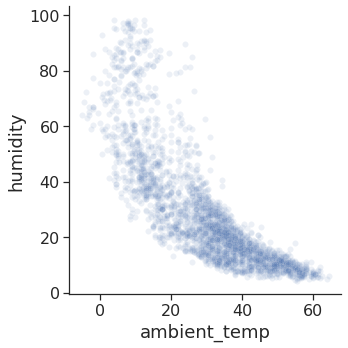

In [ ]:
sns.relplot(data=dic['Hill_Weber'],x="ambient_temp", y="humidity", alpha = 0.1)

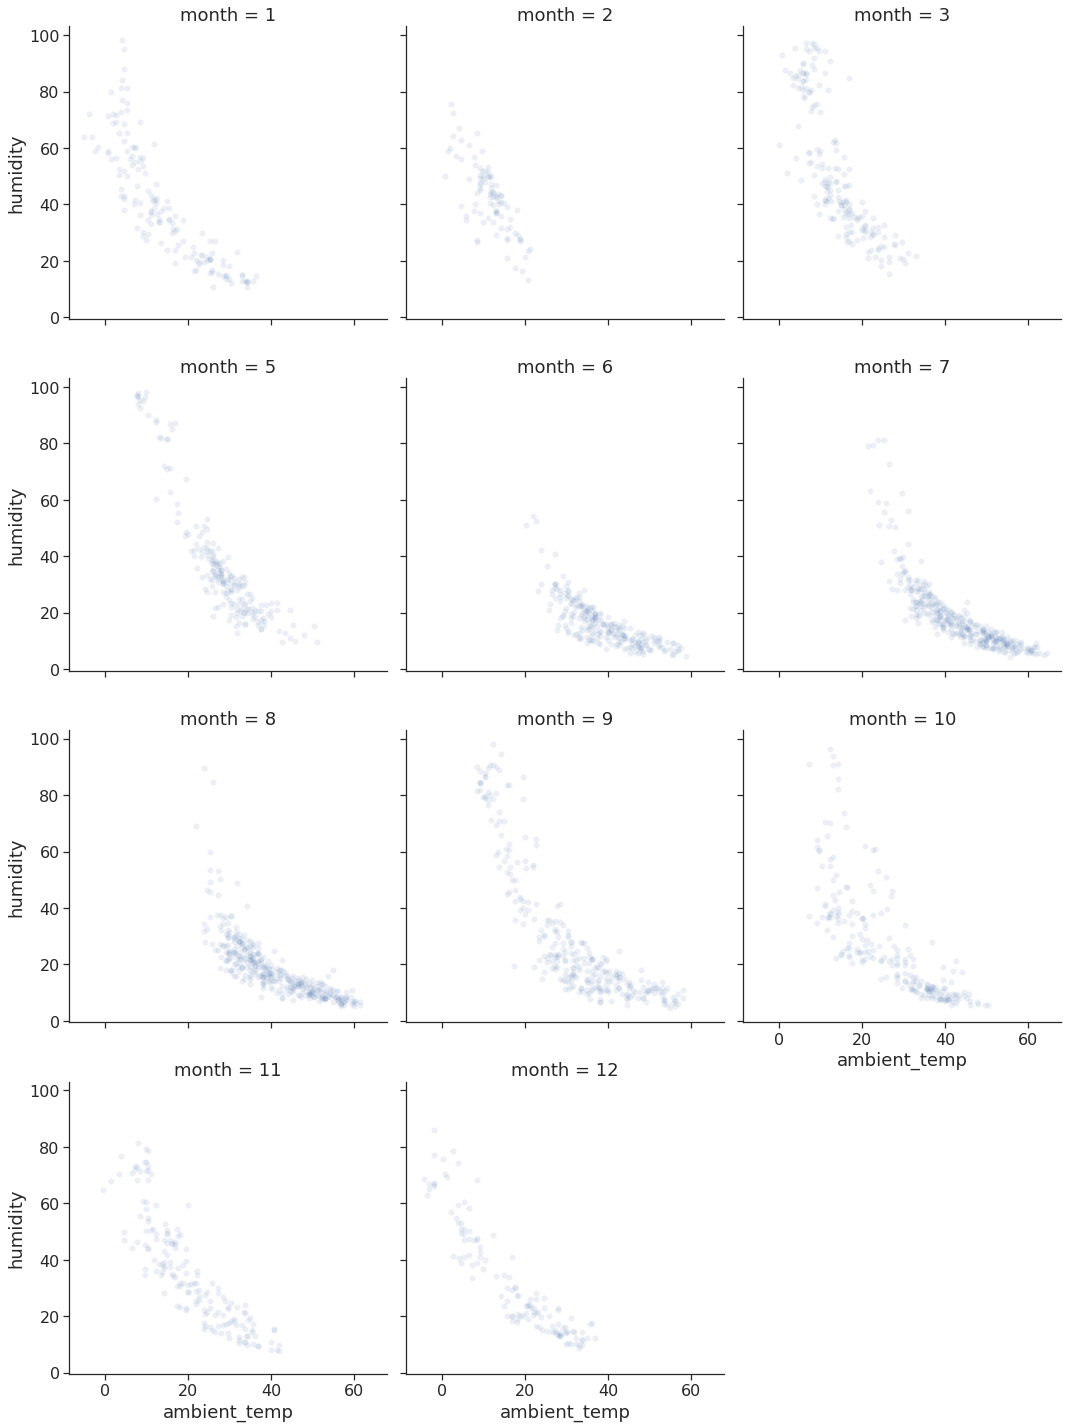

In [ ]:
sns.relplot(data=dic['Hill_Weber'],x="ambient_temp", y="humidity",col="month",col_wrap=3, alpha = 0.1)

## Visibility VS. Power

**High visibility indicates high data collection density, not very indictive of power level.**

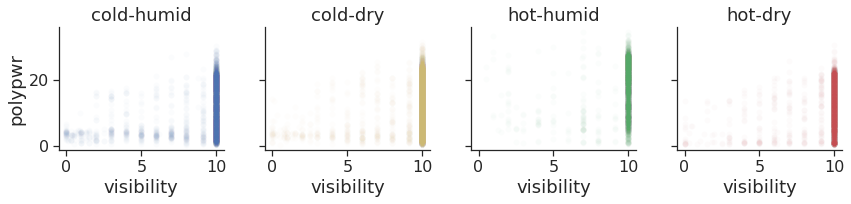

In [85]:
g = sns.FacetGrid(df, col="climate", col_wrap=4, hue = 'climate', palette=["b", "y", "g", "r"])
g = (g.map(sns.scatterplot, "visibility", "polypwr", alpha = 0.02).set_titles("{col_name}"))
plt.savefig('Visibility_VS_Power.png', bbox_inches='tight',  dpi=300)

##Hours of Day VS. Power 

**Season and Month are relative to temperature and humidity which affect power level.**

**Hours vs Power tends to show a density curve that expand across noon.**

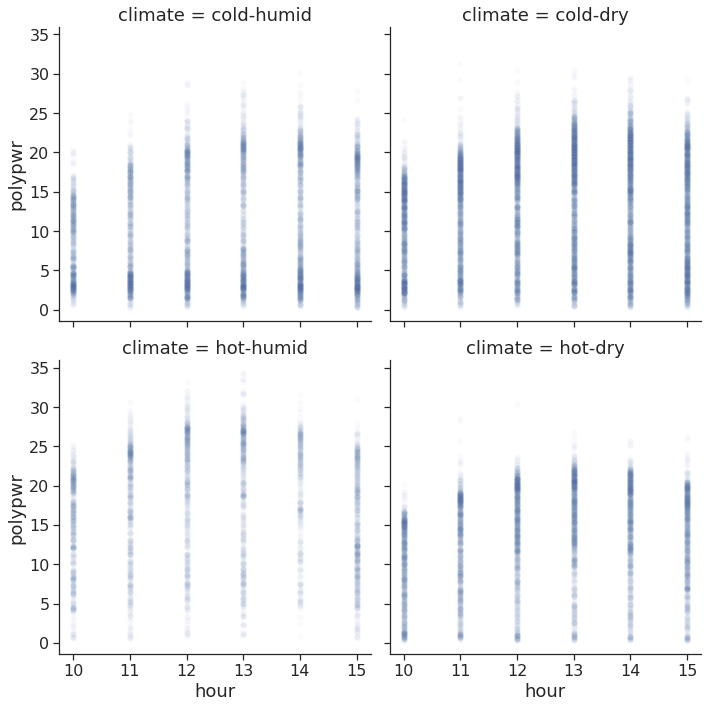

In [86]:
sns.relplot(data=df,x="hour", y="polypwr",col="climate",col_wrap=2, alpha = 0.03)

## Cloud Ceiling VS. Power

**In general, high cloud ceiling (above 700) indicates higher data density and greater power level than low cloud ceiling (below 700)**

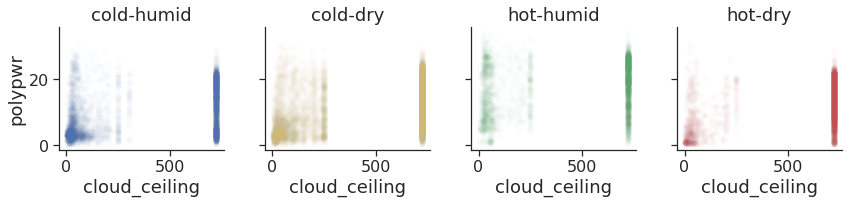

In [87]:
g = sns.FacetGrid(df, col="climate", col_wrap=4, hue = 'climate', palette=["b", "y", "g", "r"])
g = (g.map(sns.scatterplot, "cloud_ceiling", "polypwr", alpha = 0.02).set_titles("{col_name}"))
plt.savefig('Cloud.Ceiling_VS_Power.png', bbox_inches='tight', dpi=300)

# Testing on different models

In [88]:
print(df.head)
print(df.columns)

<bound method NDFrame.head of           location  latitude  longitude  altitude  month  hour  season  \
0      Camp Murray     47.11    -122.57        84     12    11  Winter   
1      Camp Murray     47.11    -122.57        84     12    13  Winter   
2      Camp Murray     47.11    -122.57        84     12    13  Winter   
3      Camp Murray     47.11    -122.57        84     12    12  Winter   
4      Camp Murray     47.11    -122.57        84     12    14  Winter   
...            ...       ...        ...       ...    ...   ...     ...   
21040        USAFA     38.95    -104.83      1947      9    15    Fall   
21041        USAFA     38.95    -104.83      1947      9    13    Fall   
21042        USAFA     38.95    -104.83      1947      9    14    Fall   
21043        USAFA     38.95    -104.83      1947      9    15    Fall   
21044        USAFA     38.95    -104.83      1947     10    14    Fall   

       humidity  ambient_temp   polypwr  wind_speed  visibility  pressure  \
0   

## Kernel Density Plots for different climates

Plot kernel density plot for different climates with different seasons:
- These plots decomposes the two peaks we want to investigate
- In total, our dataset contains 4 climate types. We will train the model based on these 4 types. Therefore, we will have 4 regression models.
- The 4 types cover most areas in the states.

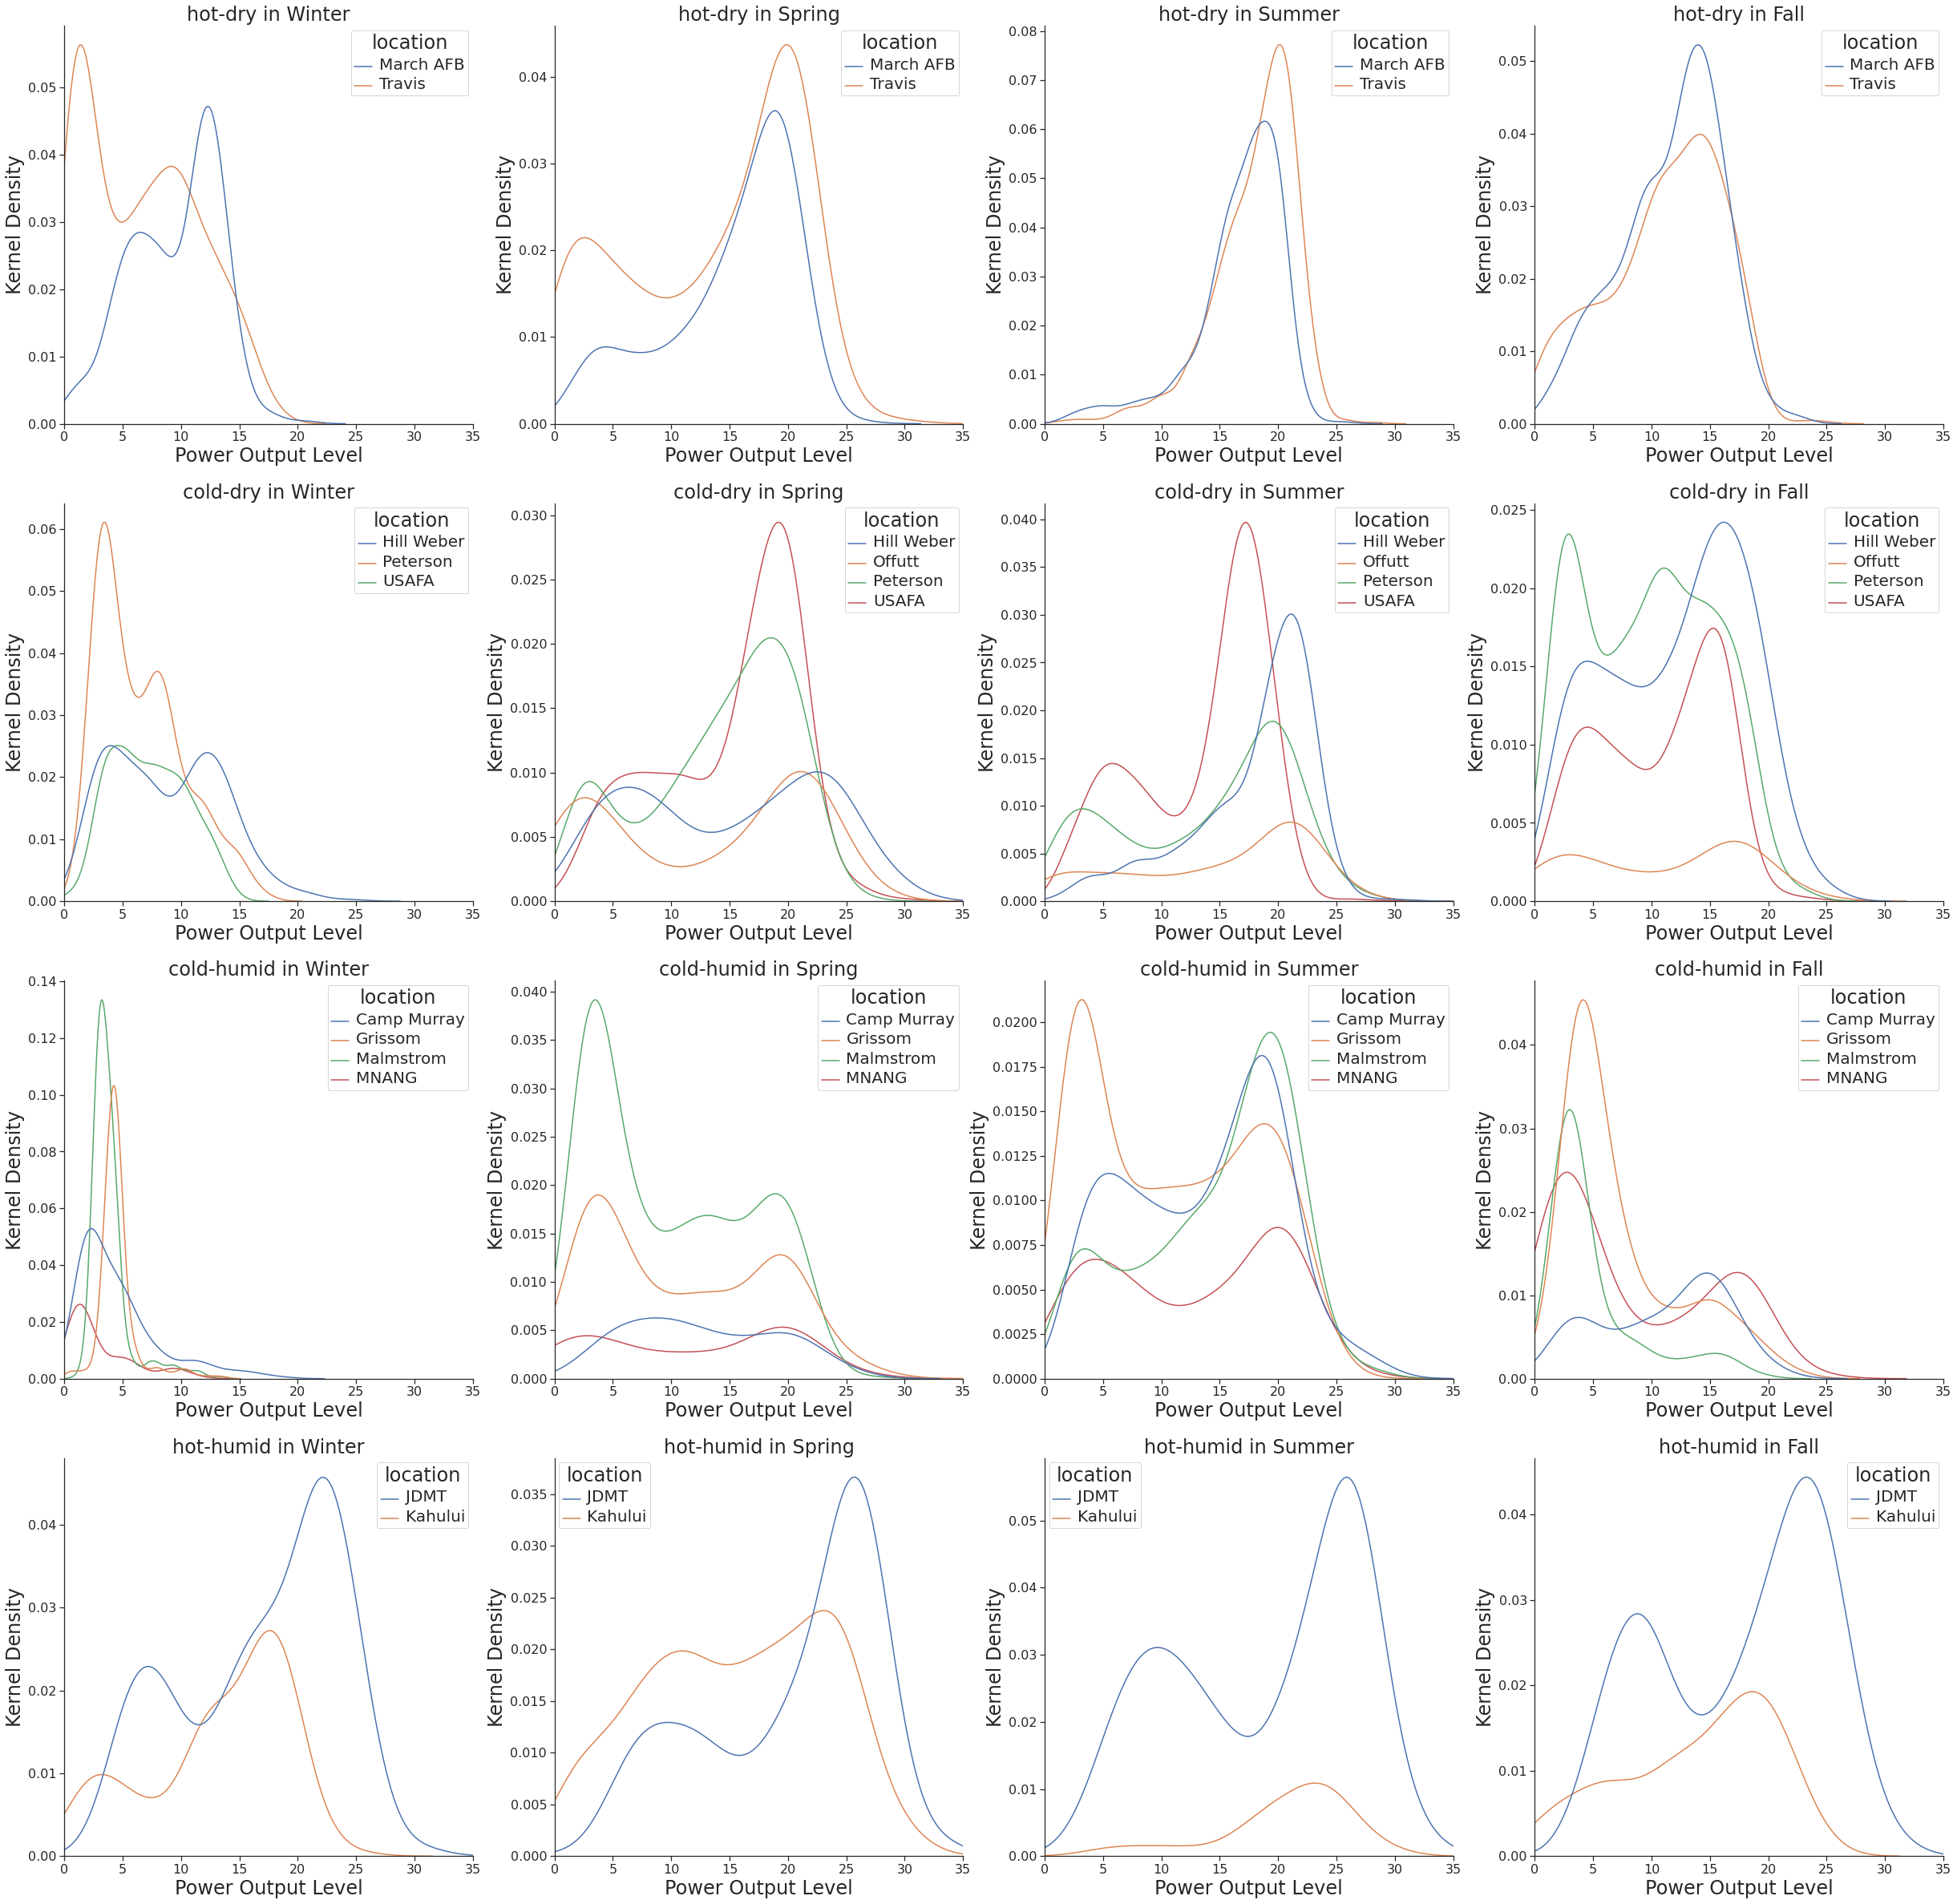

In [89]:
# kernel density plot for different seasons
f, axes = plt.subplots(4, 4, figsize=(42,42))
ax_idx = 0
from math import floor
seasons = df['season'].unique()
locations = df['location'].unique()

# slightly changed climate classification
climate = {}
climate['hot-dry'] = ['March AFB', 'Travis']
climate['cold-dry'] = ['Hill Weber', 'USAFA', 'Peterson','Offutt']
climate['cold-humid'] = ['Grissom','Malmstrom','MNANG','Camp Murray']
climate['hot-humid'] = ['JDMT', 'Kahului']

# plot kernel densities
for climate_name in climate.keys():
    climate_locations = climate[climate_name]
    for season in seasons: 
        x = floor(ax_idx / 4)
        y = ax_idx % 4

        # may want to add parameter: multiple='stack'
        sub_plot = sns.kdeplot(data = df[ (df['location'].isin(climate_locations)) & (df['season'] == season)],\
                               x='polypwr', hue='location',
                              ax = axes[x,y], bw_adjust=1)
        sub_plot.set_title(climate_name + " in " + season, fontsize=24)
        plt.setp(sub_plot.get_legend().get_texts(), fontsize='20') # for legend text
        plt.setp(sub_plot.get_legend().get_title(), fontsize='24') # for legend title
        sub_plot.set_xlabel("Power Output Level",fontsize=24)
        sub_plot.set_ylabel("Kernel Density",fontsize=24)
        
        # sub_plot.set(ylim=(0, 0.15))
        sub_plot.set(xlim=(0,35))
        ax_idx += 1

## Model Performance Testing

Now convert season data into categorical by one hot coding:

In [90]:
dummy = pd.get_dummies(df.season, prefix='season')
df_with_season_code = pd.concat([df, dummy], axis=1);
print(df_with_season_code.head)

<bound method NDFrame.head of           location  latitude  longitude  altitude  month  hour  season  \
0      Camp Murray     47.11    -122.57        84     12    11  Winter   
1      Camp Murray     47.11    -122.57        84     12    13  Winter   
2      Camp Murray     47.11    -122.57        84     12    13  Winter   
3      Camp Murray     47.11    -122.57        84     12    12  Winter   
4      Camp Murray     47.11    -122.57        84     12    14  Winter   
...            ...       ...        ...       ...    ...   ...     ...   
21040        USAFA     38.95    -104.83      1947      9    15    Fall   
21041        USAFA     38.95    -104.83      1947      9    13    Fall   
21042        USAFA     38.95    -104.83      1947      9    14    Fall   
21043        USAFA     38.95    -104.83      1947      9    15    Fall   
21044        USAFA     38.95    -104.83      1947     10    14    Fall   

       humidity  ambient_temp   polypwr  wind_speed  visibility  pressure  \
0   

Then fit multiple models:

In [91]:
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


def evaluationMetric(Y_test, Y_pred):
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    return [rmse, mae, r2]

  

def bayesianRidgeTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    reg = linear_model.BayesianRidge()
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)

    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['BayesianRidge', climate_name, len(X_train.index), *metrics]




def linearRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)

    
    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['Linear', climate_name, len(X_train.index), *metrics]



def GLMTest(X_train, Y_train, X_test, test, climate_name, output_option, output_df,
                degree=3, show_sample_prediction = False, show_outliers = False):

    Y_test = test['polypwr']
    reg = Pipeline([('poly', PolynomialFeatures(degree=degree)),
              ('linear', LinearRegression(fit_intercept=True))])
    reg = reg.fit(X_train, Y_train)

    Y_pred = reg.predict(X_test)


    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['GLM', climate_name, len(X_train.index), *metrics]


    if show_sample_prediction:
      test_predict = pd.Series(test_predict, index=Y_test.index)
      test_df = pd.concat([test_predict, Y_test], axis=1)

      test_df.set_axis(['pred', 'real'], axis=1, inplace=True)
      print("prediction sample: ")
      print(test_df.head())


    if show_outliers:
      
      test_predict = pd.Series(test_predict, index=Y_test.index)
      test_df = pd.concat([test_predict, Y_test], axis=1)

      test_df.set_axis(['pred', 'real'], axis=1, inplace=True)

      C = 3
      df_outliers = pd.DataFrame()
      
      for index, row in test_df.iterrows():
        if abs(row.pred - row.real) > C * sqrt(mse):
          df_outliers = df_outliers.append(test.loc[index])
        else:
          test_df.drop(index, inplace=True)
      
      print(df_outliers)
      print(test_df)



def AdaBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    regr = AdaBoostRegressor(random_state=42, n_estimators=100)
    regr.fit(X_train, Y_train)

    Y_pred = regr.predict(X_test)
      
    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['AdaBoostReg', climate_name, len(X_train.index), *metrics]


def HistGradBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    regr = HistGradientBoostingRegressor(random_state=42).fit(X_train, Y_train)

    Y_pred = regr.predict(X_test)
      
    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['HistGradBoost', climate_name, len(X_train.index), *metrics]



def RFRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    regr = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=0)
    regr.fit(X_train, Y_train)

    Y_pred = regr.predict(X_test)
    
    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['RandomForest', climate_name, len(X_train.index), *metrics]


def GradBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    reg = GradientBoostingRegressor(random_state=0, max_depth=5)
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)

    if output_option == "to_dataframe":
        metrics = evaluationMetric(Y_test, Y_pred)
        output_df.loc[len(output_df.index)] = ['GradientBoosting', climate_name, len(X_train.index), *metrics]


def DecisionTreeRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    reg = DecisionTreeRegressor(random_state=0)
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)

    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['DecisionTree', climate_name, len(X_train.index), *metrics]


def MLPNNRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)

    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['MultiLayerNN', climate_name, len(X_train.index), *metrics]
    


def KNNRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df, n_neighbors, weights):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    Y_pred = knn.fit(X_train, Y_train).predict(X_test)

    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['KNNReg', climate_name, len(X_train.index), *metrics]


def StackingRegTest(X_train, Y_train, X_test, Y_test, climate_name, output_option, output_df):
    estimators = [
        ('glm', Pipeline([('poly', PolynomialFeatures(degree=3)),
              ('linear', LinearRegression(fit_intercept=True))])),
        ('gradboost', GradientBoostingRegressor(random_state=42, max_depth=5)),
        ('histboost', HistGradientBoostingRegressor(random_state=42))
    ]

    regr = StackingRegressor(
        estimators=estimators,
        final_estimator=Pipeline([('poly', PolynomialFeatures(degree=3)),
              ('linear', LinearRegression(fit_intercept=True))])
    )

    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    
    if output_option == "to_dataframe":
      metrics = evaluationMetric(Y_test, Y_pred)
      output_df.loc[len(output_df.index)] = ['StackingReg', climate_name, len(X_train.index), *metrics]


    

def Test(climate_name, climate_dict, df, output_df, output_option='to_dataframe'):
    """
    Test funtion.
    Implement tests for models
    
    """

    TEST_SET_SIZE = 0.1


    # pick x features to load into the model
    x_cols = ['humidity', 'ambient_temp', 'wind_speed',
       'pressure', 'cloud_ceiling', 'latitude', 'longitude', 'altitude','month',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']

    locations = climate_dict[climate_name]
    df = df[df['location'].isin(locations)]


    # Perform train-test split
    train, test = train_test_split(df, test_size=TEST_SET_SIZE, shuffle=True, random_state=42)

    X_train = train[x_cols]
    Y_train = train["polypwr"]
    X_test = test[x_cols]
    Y_test = test["polypwr"]
    
    

    # Do model testing

    # linear models
    linearRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    bayesianRidgeTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    GLMTest(X_train, Y_train, X_test, test, show_sample_prediction=False, show_outliers=False, climate_name=climate_name, output_option=output_option, output_df=output_df)

    # clustering regression models
    KNNRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df, n_neighbors=10, weights='uniform')

    # decision tree and random forests
    DecisionTreeRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    RFRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)

    # multiple layer neural network
    MLPNNRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)


    # Boosting and Stacking  
    AdaBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    GradBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    HistGradBoostRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)
    StackingRegTest(X_train, Y_train, X_test, Y_test, climate_name=climate_name, output_option=output_option, output_df=output_df)

    
    

# main function;

# assign climate type to each location
climate_dict = {}
climate_dict['hot-dry'] = ['March AFB', 'Travis']
climate_dict['cold-dry'] = ['Hill Weber', 'USAFA', 'Peterson','Offutt']
climate_dict['cold-humid'] = ['Grissom','Malmstrom','MNANG','Camp Murray']
climate_dict['hot-humid'] = ['JDMT','Kahului']

climate_dict['mixture'] = df.location.unique()


# initialize output dataframe
output_df = pd.DataFrame(columns=['Model','Climate','TrainSetSize','MSE', 'MAE', 'R^2'])

# do testing for each climate type
for climate_name in climate_dict.keys():
    Test(climate_name, climate_dict, df_with_season_code, output_df=output_df)

# show testing result
print(output_df)

               Model     Climate TrainSetSize       MSE       MAE       R^2
0             Linear     hot-dry         4455  3.459830  2.585673  0.667328
1      BayesianRidge     hot-dry         4455  3.461753  2.586738  0.666958
2                GLM     hot-dry         4455  3.024337  2.223521  0.745805
3             KNNReg     hot-dry         4455  3.368617  2.439799  0.684637
4       DecisionTree     hot-dry         4455  4.056904  2.792659  0.542600
5       RandomForest     hot-dry         4455  3.371985  2.514834  0.684006
6       MultiLayerNN     hot-dry         4455  3.664180  2.839095  0.626870
7        AdaBoostReg     hot-dry         4455  4.262408  3.534271  0.495087
8   GradientBoosting     hot-dry         4455  3.055825  2.212043  0.740484
9      HistGradBoost     hot-dry         4455  3.113155  2.212018  0.730655
10       StackingReg     hot-dry         4455  3.036618  2.187636  0.743736
11            Linear    cold-dry         7630  4.709625  3.700810  0.523191
12     Bayes

The criteria for each model are:
- mean squared error on testing set
- R^2 on testing set
